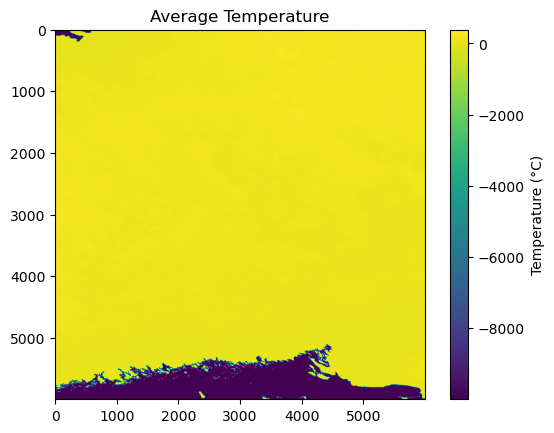

In [3]:
   import numpy as np
   from PIL import Image
   import matplotlib.pyplot as plt

   # Otwórz obraz
   im = Image.open("C:/Users/Stanislav/Downloads/dem_tif_n60e000/dem_tif_n60e000/n60e025_dem.tif")

   # Konwersja do tablicy NumPy
   imarray = np.array(im)

   # Wizualizacja danych
   plt.imshow(imarray, cmap='viridis')  # Możesz wybrać różne kolory np. 'viridis', 'plasma'
   plt.colorbar(label='Temperature (°C)')  # Dodaj pasek kolorów z etykietą
   plt.title('Average Temperature')
   plt.show()
   

Liczba warstw: 1


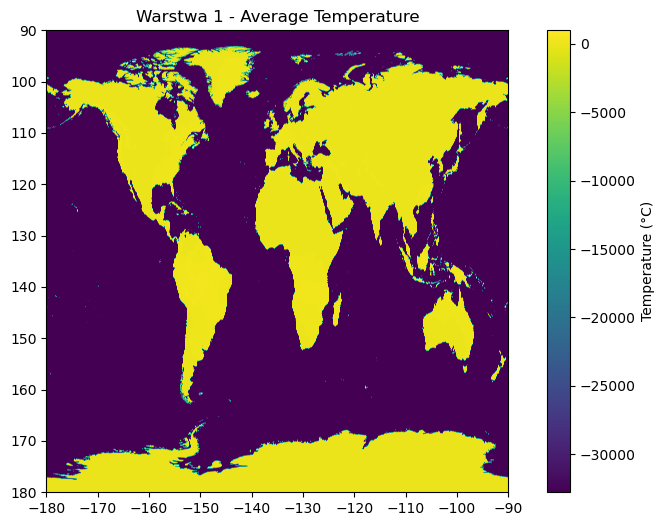

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Otwórz plik TIFF za pomocą rasterio
with rasterio.open("C:/Users/Stanislav/OneDrive/Pulpit/Data Science and Licencjat/Licencjat/Dane/WorldClim/wc2.1_30s_prec/wc2.1_30s_prec_01.tif") as src:
    # Sprawdź liczbę warstw
    num_layers = src.count
    print(f"Liczba warstw: {num_layers}")

    # Iteruj przez każdą warstwę
    for i in range(1, num_layers + 1):
        # Odczytaj warstwę jako tablicę NumPy
        imarray = src.read(i)

        # Zamień brakujące dane na NaN, jeśli to konieczne
        imarray = np.where(imarray == -3.4e+38, np.nan, imarray)

        # Wizualizacja każdej warstwy za pomocą plt.imshow
        plt.figure(figsize=(10, 6))
        plt.imshow(imarray, cmap='viridis', extent=src.bounds, origin='upper')
        plt.title(f'Warstwa {i} - Average Temperature')
        plt.colorbar(label='Temperature (°C)')
        plt.show()


In [2]:
import osgeo
from osgeo import gdal

# Sprawdź wersję GDAL
print(gdal.__version__)


3.6.2


In [7]:
from osgeo import gdal, ogr

dataset = gdal.Open('C:/Users/Stanislav/OneDrive/Pulpit/Data Science and Licencjat/Licencjat/Dane/WorldClim/wc2.1_10m_tavg/wc2.1_10m_tavg_01.tif')


In [4]:
import os
# Ścieżka do pliku rastrowego
filepath = "C:/Users/Stanislav/OneDrive/Pulpit/Data Science and Licencjat/Licencjat/Dane/WorldClim/wc2.1_30s_prec/wc2.1_30s_prec_01.tif"

# Sprawdź, czy plik istnieje
if not os.path.exists(filepath):
    print("Plik nie istnieje.")
else:
    # Otwórz plik rastrowy
    dataset = gdal.Open(filepath)
    
    if dataset is None:
        print("Nie można otworzyć pliku. Upewnij się, że jest poprawny i dostępny.")
    else:
        # Pobierz informacje o pliku
        width = dataset.RasterXSize
        height = dataset.RasterYSize
        bands = dataset.RasterCount
        driver = dataset.GetDriver().LongName

        print(f"Width: {width}, Height: {height}, Bands: {bands}, Driver: {driver}")
        
        # Pobierz pierwsze pasmo
        band = dataset.GetRasterBand(1)
        
        # Pobierz dane jako tablicę NumPy
        data = band.ReadAsArray()
        
        # Przykładowe operacje na danych
        print("Minimum value:", data.min())
        print("Maximum value:", data.max())
        
        # Zamknij dataset
        dataset = None

   

Width: 43200, Height: 21600, Bands: 1, Driver: GeoTIFF
Minimum value: -32768
Maximum value: 973


In [5]:
from osgeo import gdal

# Ścieżka do pliku rastrowego
filepath = "C:/Users/Stanislav/OneDrive/Pulpit/Data Science and Licencjat/Licencjat/Dane/WorldClim/wc2.1_30s_prec/wc2.1_30s_prec_01.tif"

# Otwórz plik rastrowy
dataset = gdal.Open(filepath)

# Sprawdź, czy plik został poprawnie otwarty
if dataset is None:
    print("Nie można otworzyć pliku. Upewnij się, że jest poprawny i dostępny.")
else:
    # Pobierz liczbę pasów
    bands = dataset.RasterCount
    print(f"Liczba pasów w pliku: {bands}")
    
    # Zamknij dataset
    dataset = None


Liczba pasów w pliku: 1


AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

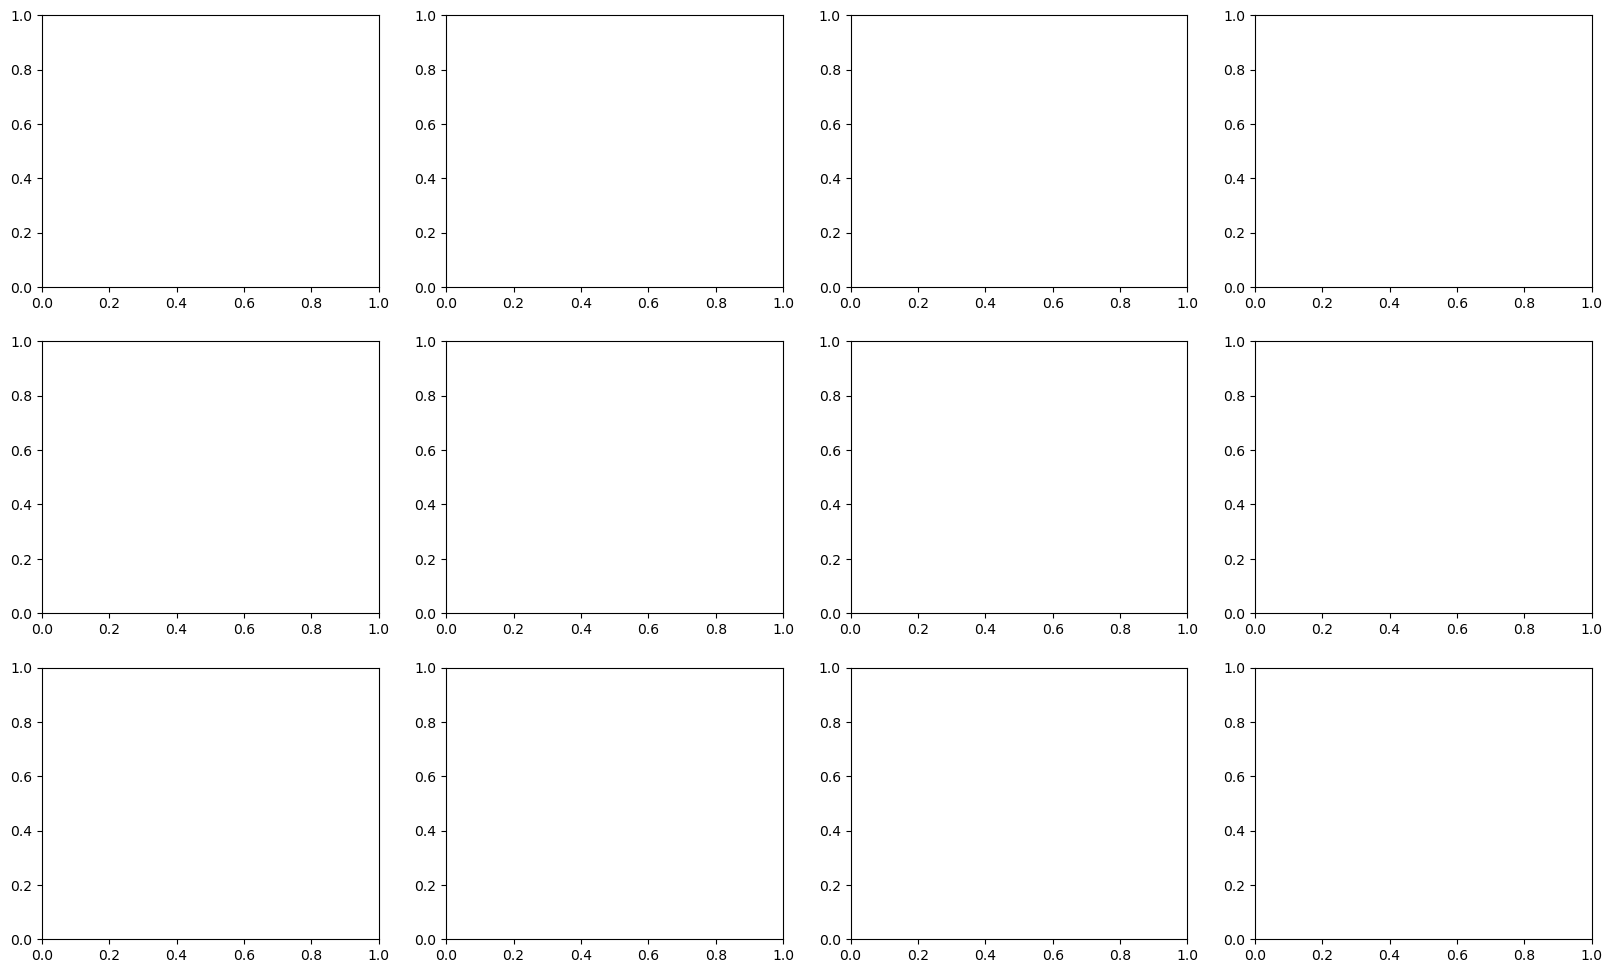

In [ ]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import os

def load_raster(file_path):
    """Funkcja do ładowania danych rastrowych i zwracania ich jako tablica NumPy."""
    dataset = gdal.Open(file_path)
    band = dataset.GetRasterBand(1)
    data = band.ReadAsArray()
    data = np.where(data == -3.4e+38, np.nan, data)
    dataset = None
    return data

# Ścieżka do katalogu z danymi
base_path = 'C:/Users/Stanislav/OneDrive/Pulpit/Data Science and Licencjat/Licencjat/Dane/WorldClim/wc2.1_10m_tavg/'

# Lista plików dla każdego miesiąca
files = [f'wc2.1_10m_tavg_{str(month).zfill(2)}.tif' for month in range(1, 13)]

# Stwórz subplots (3x4) dla 12 miesięcy
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# Iteruj przez pliki i wyświetl każdy z nich
for i, file in enumerate(files):
    file_path = os.path.join(base_path, file)
    data = load_raster(file_path)
    
    ax = axes[i]
    cax = ax.imshow(data, cmap='coolwarm', interpolation='nearest')
    ax.set_title(f'Month: {i+1}')
    ax.axis('off')

# Dodaj pasek kolorów
fig.colorbar(cax, ax=axes, orientation='horizontal', fraction=0.05, pad=0.05, label='Temperature (°C)')

plt.suptitle('Average Monthly Temperature')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Dostosuj układ, aby tytuł nie nachodził na wykresy
plt.show()
